In [1]:
import rebound
print(rebound.__build__)
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Feb 26 2020 16:11:25


In [2]:
e0 = 0.99
P0 = 2.*np.pi
def run(kappa):
    sim = rebound.Simulation()
    sim.add(m=1)
    sim.add(m=1e-3,a=1.,e=e0,primary=sim.particles[0],l=np.pi)    
    sim.move_to_com()

    sim.ri_mercurana.kappa0 = kappa
    sim.ri_mercurana.kappa1 = kappa
    sim.ri_mercurana.phi0 = "lf"
    sim.ri_mercurana.n0 = 2    
    sim.ri_mercurana.Nmaxshells = 20
    sim.integrator = "mercurana"
    sim.dt = 0.13
    Nsteps = 1000
    times = np.zeros(Nsteps)
    p_a = np.zeros(len(times))
    p_e = np.zeros(len(times))
    p_w = np.zeros(len(times))
    Nmaxshellused = np.zeros(len(times))

    for i in range(Nsteps):
        for k in range(1):
            sim.step()

        Nmaxshellused[i] = sim.ri_mercurana.Nmaxshellused
        sim.ri_mercurana.Nmaxshellused = 1
        times[i] = sim.t
        p_a[i] = sim.particles[1].a
        p_e[i] = sim.particles[1].e
        p_w[i] = sim.particles[1].omega
    return times, Nmaxshellused, p_a, p_e, p_w

In [3]:
res = []
kappas = [1e-2,1e-4,1e-6,1e-8]
for kappa in kappas:
    res.append(run(kappa))

7.0
10.0
14.0
17.0


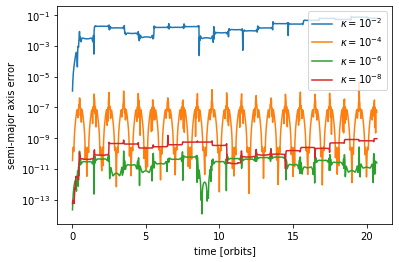

In [4]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
#for ax in axs:
ax.set_yscale("log")
ax.set_xlabel("time [orbits]")
ax.set_ylabel("semi-major axis error")
lines = ["-.",":","-","-.",":"]
for i,kappa in enumerate(kappas):
    times, Nmaxshellused, p_a, p_e, p_w = res[i]
    ax.plot(times/P0,np.abs(p_a-1.),label="$\kappa=10^{%d}$"%np.log10(kappa))
    #axs[1].plot(times/P0,np.abs(p_e-e0))
    #axs[2].plot(times/P0,np.abs(p_w)+1e-16)
    #ax.plot(times/P0,Nmaxshellused)
    print(np.max(Nmaxshellused))
ax.legend(loc="upper right")
plt.savefig("figureecc.pdf", bbox_inches = 'tight', pad_inches = 0)
os.system("cp figureecc.pdf ~/papers/mercurana/");